# Image Augmentation techniques using GapML

## Fitting a Keras Convolutional Neural Network 


### Brief introduction how to get started

   #### Clone gapml repo from github
   git clone https://github.com/andrewferlitsch/Gap
   
   #### Run ```python3 setup.py```

   ####  **OR** Install miniconda and use PIP
   https://conda.io/miniconda.html

   #### Create virtual environment & Install gapml along with dependencies
- Create an environment with: ```conda create -n gap python==3.7 jupyter pip```
- Activate: ```source activate gap```
- ```pip install gapml```

#### Exiting virtual environment when finished
- Windows: ```deactivate```
- Linux/macOS: ```source deactivate```



#### import the Gap Vision module


In [7]:
from gapml.vision import Image, Images

## Download Data
### **Note**: This download will consist of 2000+ images! And will take some time!
#### You will need to have matplotlib.pyplot and tkinter installed
Open up a terminal and run ```python stl10_input.py``` located in this tutorial directory.

#### In this section we will demonstrate some individual image augmentation techniques and then show how they can be used at scale.

**Note** the directory named 'img/' with a directory of images and each dir name starting from 0-9

In [8]:
""" For neural networks to avoid overfitting it is best to train your model with images
    that have levels of variation .  For example, lighting,
    color, and differing angles are all ways to avoid overfitting.
    
    Here, rotating the image is a simple way to add robustness to your training data.
    
    After running this cell, click on the image, press a key and minimize for now. 
"""

import cv2

image = Image('img/1/10.png',1)

rotate = image.rotate(250)
cv2.imshow('image', rotate)
cv2.waitKey(0)

13

In [9]:
""" Another useful technique is to eliminate color from your images and to remove the 3 RGB 
    channels by making your images 'grayscale'.  This is useful for simulating low light
    conditions and adding variation to your data.
    
    This is easily done using gapml and is shown below. 
"""

before_gray = gray = Image('img/1/12.png',1)
gray = Image('img/1/12.png',1, config=['grayscale'])


print('The shape before: ',before_gray.shape)
print('And after: ', gray.shape)

The shape before:  (399, 381, 3)
And after:  (399, 381)


In [11]:
""" Now lets get started with the good stuff and collect our labels.  This will be necessary
    when we are working with large amounts of data.
"""

import os
    
labels = [x for x in os.listdir('img/')]
print(labels)

['9', '2', '3', '10', '4', '6', '7', '1', '8', '5']


### This section is where we tie everything together and process all of our images at once.  This simple script will take roughly 1/3 of our data and randomly rotate an image or apply the grayscale augmentation.

In [13]:
from random import randint, randrange

rotate_val = randint(-360,360)
img_count = 0
gray_count = 0
aug_count = 0
other_count = 0
img_coll = []

for label in labels:
    print('Processing images for label...', label)
    imgdir = 'img/' +  label + '/'
    imglist = [imgdir + x for x in os.listdir(imgdir)]
    for img in range(len(imglist)):
        if randint(1,3) == 2:
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'grayscale', 'nostore'])
            img_coll.append(out_img)
            gray_count+=1
        elif randint(1,3) == 3:   
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'nostore'])
            out_img.augmentation = True
            rotated = out_img.rotate(randint(-350,350))
            img_coll.append(Image(rotated, out_img.label))
            aug_count+=1
        else:
            out_img = Image(imglist[img], int(label), config=['resize=(50,50)', 'nostore'])
            img_coll.append(out_img)
            other_count+=1
            
print('\n','Total images extracted: ', len(img_coll),'\n',
      'Grayscale images: ', gray_count,'\n',
      'Rotated imgages: ', aug_count,'\n',
      'Plain images: ', other_count)



Processing images for label... 9
Processing images for label... 2
Processing images for label... 3
Processing images for label... 10
Processing images for label... 4
Processing images for label... 6
Processing images for label... 7
Processing images for label... 1
Processing images for label... 8
Processing images for label... 5

 Total images extracted:  2781 
 Grayscale images:  944 
 Rotated imgages:  606 
 Plain images:  1231


In [14]:
""" Now that we have a collection of images that are either rotated, grayscaled or plain
    we can move on to splitting them into training and test data sets.
    
    First we need to combine this list of images into a single Images object.
"""

images = Images([x.data for x in img_coll], [x.label for x in img_coll]) 
print('Length of single images object: ',len(images))


Length of single images object:  2781


In [15]:
""" This just shows some features for some random images within this object.
"""
print('Shape: ', images[200].shape,
      'Label: ', images[200].label,
      'Size: ', images[200].size)

print('Shape: ', images[10].shape,
      'Label: ', images[10].label,
      'Size: ', images[10].size)

Shape:  (50, 50, 3) Label:  9 Size:  7500
Shape:  (50, 50, 3) Label:  9 Size:  7500


In [16]:
""" Here we split the data set into our training data with labels and our
    validation or test set with labels.  You can choose to split them anyway you like but
    I chose a 80/20 split.
"""

images.split = .2 , 125
Xtrain, Xtest, Ytrain, Ytest = images.split

print('Train count: ',len(images._train),'\n','Test count: ',len(images._test),'\n')
print("x_train", len(Xtrain))
print("y_train", len(Ytrain))
print("x_test", len(Xtest))
print("y_test", len(Ytest))

Train count:  2224 
 Test count:  557 

x_train 2224
y_train 2224
x_test 557
y_test 557


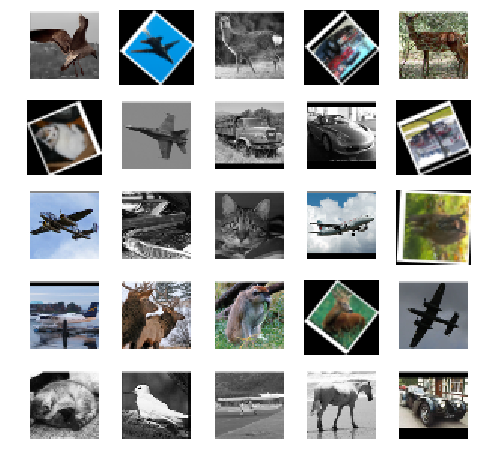

In [18]:
""" Here we get to look at some of the images that will be used for training.
    Notice the variation in rotated, grayscale and plain images.  This variation helps to prevent
    overfitting in our model.
"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from random import randint

fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img=Xtrain[randint(1,len(Xtrain))]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
""" Each element in Xtrain should be a numpy array.
    Each element should be in the shape 50 x 50 pixels
"""

print(type(Xtrain[0]))

print(Xtrain[0].shape)
print(Xtrain[2].shape)

<class 'numpy.ndarray'>
(50, 50, 3)
(50, 50, 3)


In [21]:
""" Each elment in Ytrain/Ytest should be the label and you can see 11 different labels but 
     only 10 will be used.
"""

print(Ytrain[0])
print(Ytest[50])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import h5py


""" Convolutional layers are neurons that find features that stick out within an image. These 
    features are things such as corners or distinct shapes such as wing tips on a plane.
    When such features are found they will produce higher levels of activation.
    
    The kernel will slide over the 50x50x3 matrix and calculate a 3D array and choose 
    features with distinct outputs.  These features are usually higher level and neurons 
    deeper into the net and extract further information from these outputs and 
    result in greater detail acted on.
    
    Activation layers take the output from the previous layer and feed into the next.  A 
    neuron is applied to each location or pixel and in this case would be 50x50x1=2500 neurons.
    
    Pooling layers are used after Convolutional layers and reduce the number of parameters calculated
    to reduce model overfitting.
    
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11))
model.add(Activation('sigmoid'))

batch_size = 250
epochs = 10
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(Xtrain, Ytrain, verbose=1, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(Xtest,Ytest))
 
model.evaluate(Xtest, Ytest)
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# References https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

### This next CNN is just a different variation of the one above

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import h5py


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

batch_size = 250
epochs = 500
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(Xtrain, Ytrain, verbose=1, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(Xtest,Ytest))
 
model.evaluate(Xtest, Ytest)
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)